In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
DATASET      = "data/dataset_ai_simpleCNN.csv"
TEST_SIZE    = 0.20
RANDOM_STATE = 42
BATCH_SIZE   = 10
EPOCHS       = 100

data = pd.read_csv(DATASET)
print("\nRows: %d Columns: %d"%data.shape)
data.head()


Rows: 18941 Columns: 26


,EURGBP,EURJPY,EURUSD,GBPCHF,GBPUSD,USDCAD,USDCHF,USDJPY,op_sell,forceValueCurrBar,...,slope_50_bars,slope_75_bars,slope_100_bars,slope_150_bars,slope_200_bars,num_of_succsess_buy_before,num_of_success_sell_before,num_of_fail_buy_before,num_of_fail_sell_before,profitable
0,0,0,0,0,0,0,0,0,0,-0.070885,...,-0.580276,-0.574459,-0.573269,-0.553579,-0.559833,-0.628794,0.617328,-0.567201,0.919623,1
1,0,0,0,0,0,0,0,0,1,-0.075744,...,0.436636,-0.317062,0.050488,-0.144288,-0.289605,-0.628794,0.617328,-0.567201,-0.660150,0
2,0,0,0,0,0,0,0,0,1,-0.074246,...,-0.580276,-0.325908,-0.305813,-0.553579,-0.559833,-0.628794,0.617328,-0.567201,-0.660150,1
3,0,0,0,0,0,0,0,0,1,-0.074266,...,-0.580276,-0.574459,-0.573269,-0.553579,-0.559833,0.780838,-0.656953,1.044222,-0.660150,1
4,0,0,0,0,0,0,0,0,0,-0.067780,...,-0.336060,-0.384370,-0.236651,-0.160804,-0.256022,0.780838,0.617328,-0.567201,-0.660150,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18941 entries, 0 to 18940
Data columns (total 26 columns):
EURGBP                        18941 non-null int64
EURJPY                        18941 non-null int64
EURUSD                        18941 non-null int64
GBPCHF                        18941 non-null int64
GBPUSD                        18941 non-null int64
USDCAD                        18941 non-null int64
USDCHF                        18941 non-null int64
USDJPY                        18941 non-null int64
op_sell                       18941 non-null int64
forceValueCurrBar             18941 non-null float64
calcUpSlope                   18941 non-null float64
calcDownSlope                 18941 non-null float64
slope_10_bars                 18941 non-null float64
slope_20_bars                 18941 non-null float64
slope_30_bars                 18941 non-null float64
slope_40_bars                 18941 non-null float64
slope_50_bars                 18941 non-null float64
slope_75

In [11]:
y = data["profitable"]
X = data.drop(["profitable"], axis=1)

INPUT_DIM = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
model = Sequential()
model.add(Dense(INPUT_DIM,        activation="relu", kernel_initializer="random_normal", input_dim=INPUT_DIM))
model.add(Dense(int(INPUT_DIM/2), activation="relu", kernel_initializer="random_normal"))
model.add(Dense(int(INPUT_DIM/4), activation="relu", kernel_initializer="random_normal"))
model.add(Dense(int(INPUT_DIM/8), activation="relu", kernel_initializer="random_normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))
model.compile(optimizer ="adam", loss="binary_crossentropy", metrics =["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2)

Epoch 1/100
 - 2s - loss: 0.6494 - accuracy: 0.6297
Epoch 2/100
 - 2s - loss: 0.6488 - accuracy: 0.6288
Epoch 3/100
 - 2s - loss: 0.6489 - accuracy: 0.6281
Epoch 4/100
 - 2s - loss: 0.6489 - accuracy: 0.6296
Epoch 5/100
 - 2s - loss: 0.6481 - accuracy: 0.6298
Epoch 6/100
 - 3s - loss: 0.6481 - accuracy: 0.6317
Epoch 7/100
 - 2s - loss: 0.6472 - accuracy: 0.6311
Epoch 8/100
 - 2s - loss: 0.6474 - accuracy: 0.6307
Epoch 9/100
 - 2s - loss: 0.6467 - accuracy: 0.6328
Epoch 10/100
 - 3s - loss: 0.6464 - accuracy: 0.6306
Epoch 11/100
 - 2s - loss: 0.6470 - accuracy: 0.6312
Epoch 12/100
 - 2s - loss: 0.6464 - accuracy: 0.6309
Epoch 13/100
 - 2s - loss: 0.6458 - accuracy: 0.6338
Epoch 14/100
 - 2s - loss: 0.6455 - accuracy: 0.6338
Epoch 15/100
 - 2s - loss: 0.6448 - accuracy: 0.6331
Epoch 16/100
 - 2s - loss: 0.6449 - accuracy: 0.6327
Epoch 17/100
 - 2s - loss: 0.6448 - accuracy: 0.6318
Epoch 18/100
 - 2s - loss: 0.6436 - accuracy: 0.6342
Epoch 19/100
 - 2s - loss: 0.6433 - accuracy: 0.6341
Ep

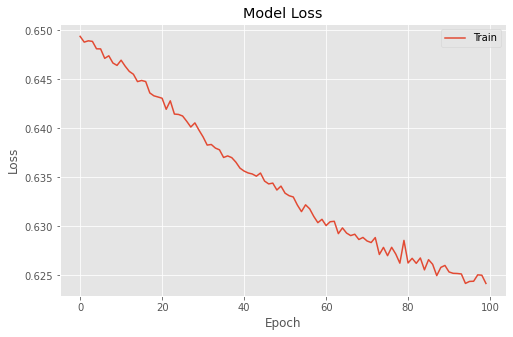

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 579 1054]
 [ 478 1678]]


In [19]:
print("Accuracy: {:.2f}%".format(((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))*100) )

Accuracy: 59.57%


In [52]:
!git clone https://github.com/ethanp55/Forex-AI.git

Клонирование в «Forex-AI»…
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 6), reused 0 (delta 0), pack-reused 0
Распаковка объектов: 100% (24/24), готово.
